# Machine Learning Group Project for Diabetes Diagnosis

This project aimed to learn and apply basic skills in machine learning.

ach student tried to apply different algorithms on provided training and test dataset.

In this script, K-nearest neighbors (KNN) algorithm was applied.

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
# Reading the training data
data = pd.read_csv("training_data(no_pre-diabetes).csv")

In [3]:
# Splitting features and target
x = data.iloc[:,1:]
y = data.Diabetes_012

# Splitting training and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

Maximum accuracy:- 0.8553364894828309 at K = 15


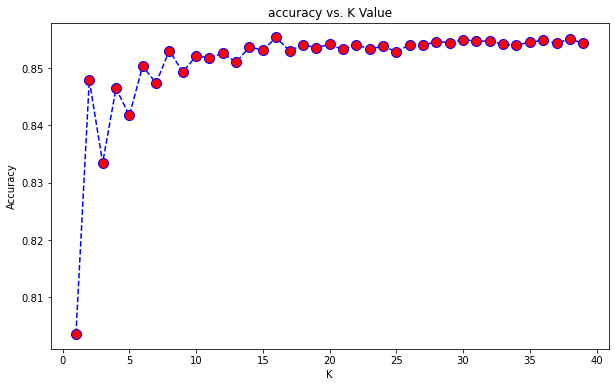

In [4]:
# visualize the plot between accuracy and K value
acc = []
from sklearn import metrics
for i in range(1,40):
    knn_trial = KNeighborsClassifier(n_neighbors = i)
    knn_trial.fit(x_train,y_train)
    yhat = knn_trial.predict(x_val)
    acc.append(metrics.accuracy_score(y_val, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Minimum error:- 0.14466351051716905 at K = 15


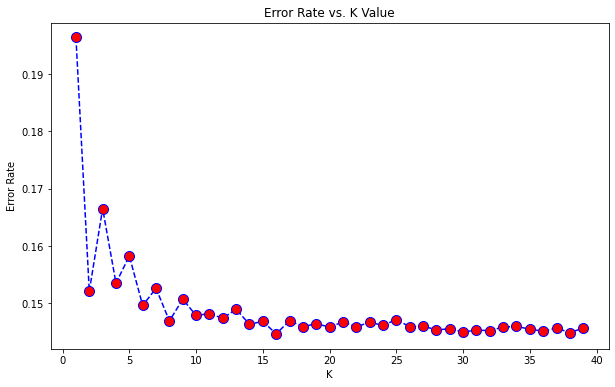

In [5]:
# visualize the plot between error rate and K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [6]:
# Default setting = base model
from sklearn.metrics import confusion_matrix, precision_score, recall_score
knn_base = KNeighborsClassifier()
knn_base.fit(x_train, y_train)

# Prediction
base_val_pred=knn_base.predict(x_val)

# Accuracy, Precision, Recall, Specificity
confusion_hard_base = confusion_matrix( y_val, base_val_pred)
accuracy_base = accuracy_score(y_val , base_val_pred)
precision_base = precision_score(y_val , base_val_pred, pos_label = 2.0)
recall_base = recall_score(y_val , base_val_pred,pos_label = 2.0)

tn_base, fp_base, fn_base, tp_base = confusion_matrix(y_val, base_val_pred).ravel()
specificity_base = tn_base/(tn_base+fp_base)

print('\nKNN Accuracy for base model=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nspecificity: {3:.4f}'.format(accuracy_base, precision_base, recall_base, specificity_base))



KNN Accuracy for base model=: 0.8417, 
precision: 0.4108, 
recall: 0.2072,
specificity: 0.9495


In [7]:
# Using K = 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

print("The score for kNN without cross val and without using smote is")
print("Training set: {:6.2f}%".format(100*knn.score(x_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(x_val, y_val)))

The score for kNN without cross val and without using smote is
Training set:  86.97%
Validation set:  85.31%


In [10]:
# Prediction scores for K = 15
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Prediction
val_pred=knn.predict(x_val)

# Accuracy, Precision, Recall, Specificity
confusion_hard_val = confusion_matrix( y_val, val_pred)
accuracy_val = accuracy_score(y_val , val_pred)
precision_val = precision_score(y_val , val_pred, pos_label = 2.0)
recall_val = recall_score(y_val , val_pred,pos_label = 2.0)

tn, fp, fn, tp = confusion_matrix(y_val, val_pred).ravel()
specificity_val = tn/(tn+fp)
print('\nKNN Accuracy for validation set=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nspecificity: {3:.4f}'.format(accuracy_val, precision_val, recall_val, specificity_val))


KNN Accuracy for validation set=: 0.8531, 
precision: 0.4806, 
recall: 0.1432,
specificity: 0.9737


In [11]:
# Test the model on test set

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Reading the data
test_data = pd.read_csv("testing_data(no_pre-diabetes).csv")
x_test = data.iloc[:,1:]
y_test = data.Diabetes_012

# Prediction
test_pred=knn.predict(x_test)

# Accuracy, Precision, Recall, Specificity
confusion_hard = confusion_matrix( y_test, test_pred)
accuracy = accuracy_score(y_test , test_pred)
precision = precision_score(y_test , test_pred, pos_label = 2.0)
recall = recall_score(y_test , test_pred,pos_label = 2.0)
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn/(tn+fp)
print('\nKNN Accuracy for test set=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nspecificity: {3:.4f}'.format(accuracy, precision, recall, specificity))



KNN Accuracy for test set=: 0.8681, 
precision: 0.6185, 
recall: 0.1839,
specificity: 0.9812


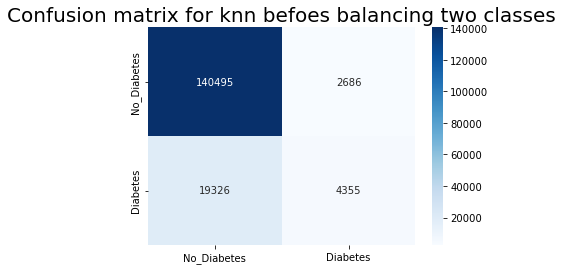

In [12]:
# confusion_matrix plot
import seaborn as sns
class_label = ["No_Diabetes", "Diabetes"]
df_cm = pd.DataFrame(confusion_hard, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",  cmap = "Blues" )
plt.title('Confusion matrix for knn befoes balancing two classes', fontsize = 20); # title with fontsize 20